In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\German\Desktop\Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales',axis=1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [10]:
polynomial_converter.transform(X).shape

(200, 9)

In [11]:
X.shape

(200, 3)

In [12]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [13]:
poly_features = polynomial_converter.transform(X)

In [14]:
poly_features.shape

(200, 9)

In [15]:
poly_features[0]#первые три совпадают с X.iloc[0], следующие три их квадраты(так как degree=2),
#последние три это произведения нецелевых данных(признаков)

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [16]:
230.1*37.8

8697.779999999999

In [17]:
37.8*69.2

2615.7599999999998

In [18]:
230.1*69.2

15922.92

In [19]:
230.1**2

52946.009999999995

In [20]:
69.2**2

4788.64

In [21]:
37.8**2

1428.8399999999997

In [22]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
poly_features.shape

(200, 9)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3, 
                                                     random_state=101)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train,y_train)

LinearRegression()

In [29]:
test_predictions = model.predict(X_test)

In [30]:
model.coef_#коэффициенты бетта

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
MAE=mean_absolute_error(y_test,test_predictions)

In [33]:
MSE=mean_squared_error(y_test,test_predictions)

In [34]:
RMSE=np.sqrt(MSE)

In [35]:
MAE

0.4896798044803629

In [36]:
MSE

0.4417505510403437

In [37]:
RMSE

0.6646431757269037

In [38]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [39]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [40]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [41]:
# Ошибка на обучающем наборе для той или иной степени полинома
train_rmse_errors = []
# Ошибка на тестовом наборе для той или иной степени полинома
test_rmse_errors = []

for d in range(1,10):
     # Создаём полиномиальные данные для степени "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # Разбиваем эти новые полиномиальные данные на обучающий и тестовый наборы данных
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, 
                                                        random_state=101)
    
    # Обучаем модель на этом новом наборе полиномиальных данных
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # Выполняем предсказание и на обучающем, и на тестовом наборе данных
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Вычисляем ошибки
    
    # Ошибки на обучающем наборе данных
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Ошибки на тестовом наборе данных
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Добавляем ошибки в список для последующего нанесения на график
       
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [42]:
train_rmse_errors

[1.7345941243293765,
 0.5879574085292231,
 0.4339344356902064,
 0.35170836883993506,
 0.2509343091323787,
 0.19469314508408367,
 5.421805550852404,
 0.14079067163188752,
 0.1732915836275725]

In [43]:
test_rmse_errors

[1.5161519375993882,
 0.6646431757269037,
 0.5803286825222314,
 0.5077742638661064,
 2.575811455844279,
 4.2493659915687,
 1379.0512647703233,
 4236.140984968127,
 94348.91311737454]

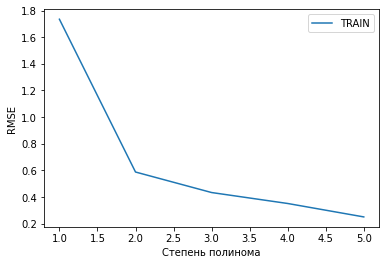

In [44]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.xlabel("Степень полинома")
plt.ylabel("RMSE")
plt.legend()
#при увеличении степени полинома ошибка падает

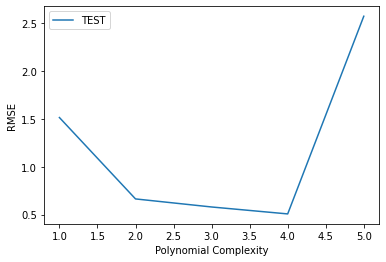

In [45]:
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

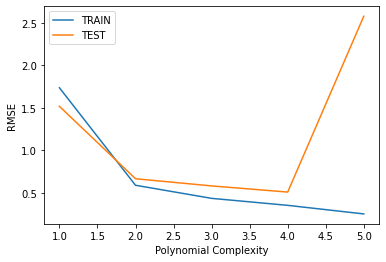

In [46]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()
#оптимальная степень полинома 2 или 3

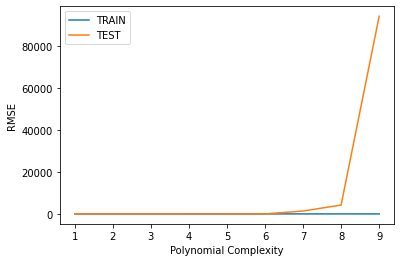

In [47]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [48]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [49]:
final_model = LinearRegression()

In [53]:
final_converted_X=final_poly_converter.fit_transform(X)

final_model.fit(final_converted_X,y)

LinearRegression()

In [54]:
from joblib import dump, load

In [59]:
dump(final_model, 'final_poly_model.joblib') 

['final_poly_model.joblib']

In [60]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [61]:
loaded_converter = load('final_converter.joblib')

In [62]:
loaded_model = load('final_poly_model.joblib')

In [63]:
campaign = [[149,22,12]]#данные для признаков 149 для ТВ, 22 для радио, 12 для газет

In [64]:
loaded_converter.fit_transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [65]:
loaded_converter.fit_transform(campaign).shape

(1, 19)

In [66]:
transformed_data = loaded_converter.fit_transform(campaign)

In [67]:
loaded_model.predict(transformed_data)#такие будут продажи

array([14.64501014])